# Laboratorio 6
#### 20880 Sebastian Aristondo
#### 20293 Daniel Gonzalez

## Ejercicio 1

Cree un programa en Python (o en el lenguaje de su preferencia) para modelar la distribución de temperatura dentro
de una varilla sólida. Utilice modelado secuencial multiescala, donde combina un modelo macroscópico y un
modelo microscópico. Suponga que la varilla consta de dos materiales diferentes con diferentes conductividades
térmicas.

In [175]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [36]:
class atomo(object):
    
    def __init__(self, masa, left_neighbour, right_neighbour, position):
        self.move= ["left", "right"]
        self.mass = masa
        self.left_neighbour = left_neighbour
        self.right_neighbour = right_neighbour
        self.position = position

    def random_move(self):
        self.position = random.choice(self.move)
    
    def exist_colision(self):
        if self.left_neighbour:
            if self.left_neighbour.position == "right" and self.position == "left":
                return (self.left_neighbour.mass + self.mass)*0.5
        if self.right_neighbour:  
            if self.right_neighbour.position == "left" and self.position == "right":
                return (self.right_neighbour.mass + self.mass)*0.5
        
        return 0


In [37]:
masa_aluminio = 2700
masa_hierro = 7850
tipo_atomo = [masa_aluminio, masa_hierro]
c = (masa_hierro * 450 + masa_aluminio * 900) / (masa_aluminio + masa_hierro)
T = 280
iteraciones_micro = 1000
atomos = 1000
epochs = 20

In [38]:
# Definir el rango deseado para velocidades más frecuentes
velocidad_minima = 0.5
velocidad_maxima = 1.5

# Calcular la media en ese rango
media_en_rango = (velocidad_maxima + velocidad_minima) / 2

# Calcular la tasa (lambda) para la distribución exponencial
lambda_param = 1 / media_en_rango

# Tamaño de la muestra
tamaño_muestra = epochs * iteraciones_micro

# Generar una muestra de velocidades con distribución exponencial
muestras_exponencial = np.random.exponential(scale=1/lambda_param, size=tamaño_muestra)

In [39]:
varilla=[]
m = 0
for i in range(atomos):
    if i % 2 ==0:
        varilla.append(atomo(masa_aluminio, None, None, i))
        m += masa_aluminio
    else:
        varilla.append(atomo(masa_hierro, None, None, i))
        m += masa_hierro
        
for i in range(atomos):
    if i == 0:
        varilla[i].right_neighbour = varilla[i+1]
    elif i == atomos-1:
        varilla[i].left_neighbour = varilla[i-1]
    else:
        varilla[i].left_neighbour = varilla[i-1]
        varilla[i].right_neighbour = varilla[i+1]
    

In [40]:
def calculate_Q(res, velocity):
    return res * velocity

In [41]:
def temperature_differnce(Q):
    return Q / (m * c)

In [42]:
i = 0
temperatura = []
Q = []
for epoch in range(epochs):
    Q_acumulado = 0
    for iteraciones in range(iteraciones_micro):
        velocidad = muestras_exponencial[i]
        i += 1
        for atomo in varilla:
            atomo.random_move()
        for atomo in varilla:
            Q_acumulado += calculate_Q(atomo.exist_colision(), velocidad)
    Q_acumulado /= 2.0
    Q_promedio = Q_acumulado / iteraciones_micro
    T = T + temperature_differnce(Q_promedio)
    Q.append(Q_promedio)
    temperatura.append(T)


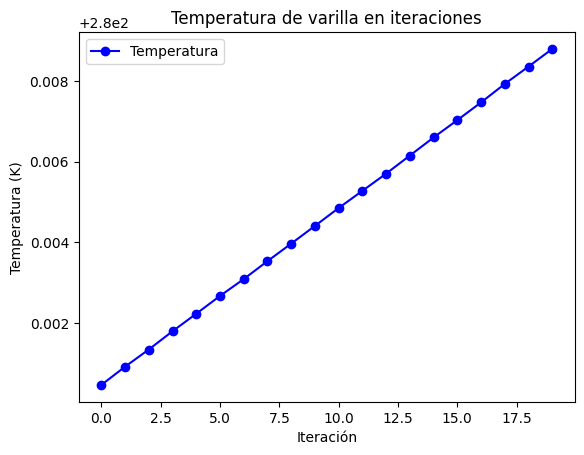

In [43]:
# Crear el gráfico con líneas que unen los puntos para 'temperatura'
plt.plot(range(len(temperatura)), temperatura, color='b', label='Temperatura', marker='o', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Iteración')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura de varilla en iteraciones')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

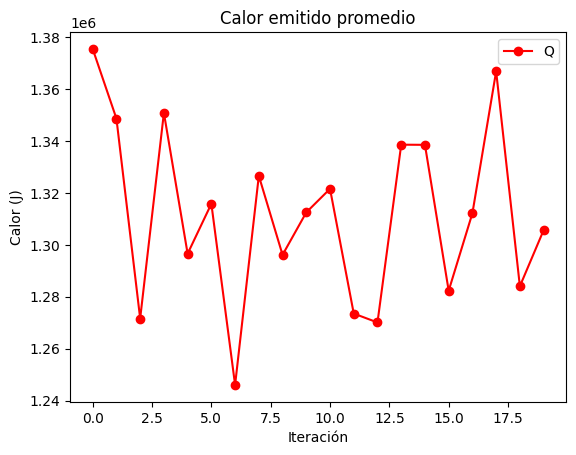

In [44]:
# Crear el gráfico con líneas que unen los puntos para 'Q'
plt.plot(range(len(Q)), Q, color='r', label='Q', marker='o', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Iteración')
plt.ylabel('Calor (J)')
plt.title('Calor emitido promedio')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

**a. ¿En qué se diferencia el modelo macroscópico del modelo microscópico en este escenario?**


El modelo macroscópico se basa en la temperatura de la varilla en general, mientras que el modelo microscópico se basa en la temperatura de los átomos que componen la varilla. También si diferencia en que el modelos microscópico se basa en agentes y el modelo macroscópico es una formula de energía cinética.

**b. ¿Cuáles son las condiciones de contorno del modelo microscópico y cómo las determina el modelo macroscópico?**


La condición del modelo microscópico se basa en si ocurre una colisión entre los átomos. Todos aquellos átomos que colisionen generar calor. El modelo macroscópico calculara la temperatura de la varilla en base a la suma de las temperaturas de los átomos.

**c. ¿Cómo adaptaría este modelo multiescala si la varilla estuviera compuesta por más de dos materiales diferentes?**


Debido a como realizamos nuestra implementación el modelo se adaptaría muy facil. Al momento de inicializar la calse atomo solo sería de establecer la masa de los n materiales nuevos. La simulación sería exactamente igual ya que solo se estaría afectando la masa de los átomos.

## Ejercicio 2

Implemente un enfoque de modelado multiescala concurrente en Python para simular el flujo de agua a través de
una formación rocosa porosa. Utilice tanto un modelo macroscópico (ley de Darcy) como un modelo microscópico
(ecuaciones de Navier-Stokes) para describir el flujo.

In [45]:
A = 1.25 # m^2
ro = 997 # kg/m^3
miu = 0.226 * 10 ** -6 # Visocidad cinemática 60 C
delta_P = 1000 # Pa

In [46]:
# Paso 1: Simulación del flujo con la Ley de Darcy (Macroescala)
def simulate_darcy_flow(velocidad_media = 0.5):
    k = (ro * velocidad_media * L) / delta_P
    return k*A*(delta_P / L), k


# Parámetros del problema
L = 1.0  # Longitud del dominio
Nx = 100  # Número de puntos de la malla espacial
dx = L / (Nx - 1)  # Tamaño de paso en la malla
nu = 0.226 * 10 ** -6  # Viscosidad cinemática
dt = 0.001  # Paso de tiempo
# Inicialización de la malla espacial
x = np.linspace(0, L, Nx)

# Inicialización de la condición inicial (perfil inicial de velocidad)
u = np.zeros(Nx)
u[int(0.5 / dx):int(0.6 / dx)] = 1.0  # Condición inicial: un pulso de velocidad


# Paso 2: Simulación del flujo con las Ecuaciones de Navier-Stokes (Microescala)
def simulate_navier_stokes_flow(macroscopic_results, u):
    u_new = np.zeros(Nx)
    for i in range(1, Nx - 1):
        # Implementación de la discretización de las ecuaciones de Navier-Stokes
        k_i = macroscopic_results
        u_new[i] = u[i] + k_i + nu * dt / dx**2 * (u[i+1] - 2 * u[i] + u[i-1])

    # Actualización del perfil de velocidad
    u = u_new
    return np.mean(u)


velocidad_result =[] 
velocidad_micro = []
# Paso 3: Enfoque Multiescala Concurrente
def multiscale_simulation():
    # Inicializa las simulaciones macro y micro
    macroscopic_results, k = simulate_darcy_flow()
    microscopic_results = simulate_navier_stokes_flow(k, u)
    
    # Itera o acopla las simulaciones según sea necesario
    for _ in range(num_iterations):
        # Realiza la simulación microscópica
        microscopic_results = simulate_navier_stokes_flow(k, u)
        # Realiza la simulación macroscópica
        macroscopic_results, k = simulate_darcy_flow(microscopic_results)
        velocidad_result.append(macroscopic_results)
        velocidad_micro.append(microscopic_results)
        # velocidad_result.extend(macroscopic_results)
    
    return velocidad_result

# Paso 4: Visualización del Flujo de Agua
def visualize_results(speed):
    plt.plot(speed)
    plt.show()

# Ejecuta la simulación multiescala y visualiza los resultados
num_iterations = 1000
vel = multiscale_simulation()

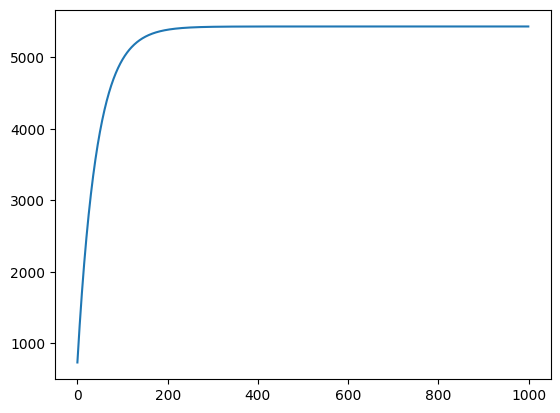

In [47]:
visualize_results(vel)

a. ¿En qué se diferencia el enfoque multiescala concurrente del enfoque multiescala secuencial?

La principal diferencia entre los dos enfoques es el paso de información entre las escalas. En un enfoque secuencial, primero se ejecuta cierta cantidad de iteraciones del modelo microscópico y luego la información recopilada se le pasa al modelo macroscópico. En el modelo concurrente, como se observa en esta simulación, se le pasa información de una escala a otra en cada iteración, sin tener que esperar a que corra una primero y luego la otra, es una actualización constante.


b. ¿Qué información del modelo macroscópico se pasa al modelo microscópico y cómo afecta a la
simulación microscópica?

La información que se le pasa del macroscópico al microscópico en este caso es la permeabilidad general de la roca, la cual, afecta las ecuaciones de navier stokes al momento de calcular la velocidad de los fluidos. Se pasa esta información, debido a que la permeabilidad de la roca no es uniforme, cambia con el tiempo y también con el paso del tiempo. Esto afecta la velocidad con la que pasa el agua microscópicamente, debido a que a una menor permeabilidad debe pasar menos agua, lo que se observa en el gráfico.


c. ¿Cuáles son las ventajas de utilizar modelado multiescala concurrente en este escenario?

En este escenario es crucial usar el modelado concurrente, debido a que permite obtener información en cada timestep de cómo está pasando el agua microscópicamente. Si se hiciera secuencial, solo se obtendría información de la velocidad promedio y no de cada iteración, lo cual no permitiría actualiza adecuadamente los valores macroscópicos, además de que no se podría modificar la permeabilidad en tiempo real microscópicamente. Entonces, al usar el modelo podemos tener una representación más realista y precisa del fenómeno.



## Ejercicio 3

Tiene la tarea de modelar el crecimiento de la población en múltiples escalas, desde organismos individuales hasta
la población global. Para esto debe implementar un modelo multiescala en Python para analizar el crecimiento
poblacional y su impacto.

In [48]:
class packet(object):
    
    def __init__(self, mens, womens,number):
        self.number = number
        self.mens = int(mens)
        self.womens = int(womens)
        self.childrens_probability = random.uniform(0.1, 1)

    def sex(self,sobrante):
        cantidad_hijos = int(min(sobrante,min(self.mens, self.womens))/4 * self.childrens_probability)
        proporcion = random.uniform(0.1, 1)
        self.mens += int(cantidad_hijos * proporcion)
        self.womens += int(cantidad_hijos * (1-proporcion))
        
        
    
    def consume_resources(self):
        return int(self.mens + self.womens)

    def starvation(self,deficit):
        deficit = int(deficit)
        
        for dead in range(deficit):
            if dead %2 == 0 and self.mens > 0:
                self.mens -= 1
            elif dead %2 != 0 and self.womens > 0:
                self.womens -= 1
                
    def get_population(self):
        return int(self.mens + self.womens)

In [49]:
class village(object):
    
    def __init__(self, resources):
        self.resources = int(resources)
        self.max_resources = int(resources)
        self.regenerate = 1+random.uniform(0.5, 0.9)

    def consume_resources(self, consumtion):
        self.resources -= consumtion
    
    def regenerate_resources(self):
        if self.resources < 100:
            self.resources += 123
        self.resources *= self.regenerate
        
        if self.resources > self.max_resources:
            self.resources = self.max_resources
            
        self.resources = int(self.resources)

    def get_resources(self):
        return self.resources

    
        

In [50]:
#SIMULACION DE POBLACIONES
random.seed(8)
cantidad_lugares = 5
lugares = []
poblaciones = []

for v in range(cantidad_lugares):
    lugares.append(village(random.uniform(1000, 2500)))
    if cantidad_lugares - 2 >v:
        poblaciones.append(packet(random.uniform(50, 70), random.uniform(50, 80), v))

dias_simulacion = 450

total_population = []
total_resources = []

acu_p = 0
acu_r = 0
for poblacion in poblaciones:
    acu_p += poblacion.get_population()
    
for lugar in lugares:
    acu_r += lugar.get_resources()
    
total_population.append(acu_p)
total_resources.append(acu_r)    


for dia in range(dias_simulacion):
    acu_p = 0
    acu_r = 0
    for poblacion in poblaciones:
        ubicacion = random.randint(0, cantidad_lugares-1)
        visited_ubicacion = lugares[ubicacion]
        resource_poblacion = poblacion.consume_resources()
        deficit = resource_poblacion - visited_ubicacion.get_resources()
        if deficit > 0:
            poblacion.starvation(deficit)
            visited_ubicacion.consume_resources(resource_poblacion-deficit)
        else:
            visited_ubicacion.consume_resources(resource_poblacion)
            poblacion.sex(abs(deficit))
        
        acu_p += poblacion.get_population()
        acu_r += visited_ubicacion.get_resources()
        
    total_population.append(acu_p)
    total_resources.append(acu_r)
    
    for lugar in lugares:
        lugar.regenerate_resources()
        
    

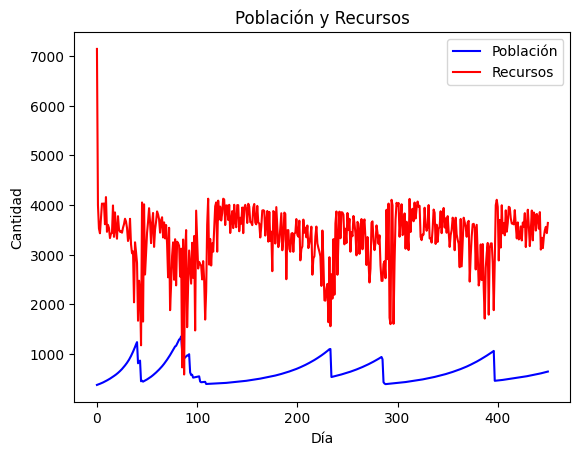

In [51]:

plt.plot(range(len(total_population)), total_population, color='b', label='Población', linestyle='-')
plt.plot(range(len(total_resources)), total_resources, color='r', label='Recursos', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.title('Población y Recursos')
plt.legend()
plt.show()

**a. ¿Qué es el modelado multiescala y por qué es esencial para comprender sistemas complejos como el
crecimiento de la población?**

El modelado multiescala es una técnica utilizada en la ciencia y la ingeniería para comprender y representar sistemas complejos que operan en múltiples niveles de organización y con interacciones que ocurren a diferentes escalas espaciales y temporales. Es esencial para comprender sistemas complejos como el crecimiento de la población, ya que permite modelar el fenómeno a diferentes escalas, lo que permite obtener información más precisa y realista del fenómeno.

**b. Describe el modelo a nivel individual en esta simulación multiescala. ¿Qué factores se consideran a escala
individual?**  

Los individuos (hombres o mujeres) consumen los recursos de los valles y si ven que hay suficientes recursos como para tener hijos, entonces se reproducen. Si no hay suficientes recursos, entonces no se reproducen. Los individuos también mueren de hambre si no hay suficientes recursos. Cada manda tiene una distribución uniforme sobre como se distribuieran los hijojs cuandos hombres y mujeres se tendrán en cada manada.

**c. Discuta el modelo a escala de comunidad local. ¿Cómo incorpora interacciones entre individuos y factores
ambientales?**  

Los valles tienen una capacidad maxima de recursos, asi como también una taza de recuperación. Los individuos se mueven de forma aleatoria entre los valles buscando recursos. Por lo tanto si una manda se va dejando un valle sin recursos y luego llega una manada, esta manada se vera afectada perdiendo miembros por inanición.

**d. Explique el modelo a escala global. ¿Qué parámetros y factores se consideran al modelar toda la población
mundial?**

Toda la población se ve afectada por las acciones de las manadas, ya que si una manada se va de un valle dejándolo sin recursos, entonces la población mundial se ve afectada, ya que hay menos recursos para todos. Además, la población mundial se ve afectada por la cantidad de recursos que hay en cada valle, ya que si hay más recursos, entonces la población mundial crece más rápido, y si hay menos recursos, entonces la población mundial crece más lento. A su vez como los valles tienen una capacidad maxima de producción de recursos la población también tiene un limite de crecimiento si las condiciones adecuadas se dan.


## Ejercicio 4

Tiene la tarea de modelar el flujo de tráfico urbano a múltiples escalas, desde vehículos individuales hasta toda la
ciudad. Implemente un modelo de flujo de tráfico multiescala en Python para analizar el comportamiento del tráfico
y los patrones de congestión.


In [272]:
random.seed(8)

In [273]:
class Calle():
    def __init__(self, name) -> None:
        self.name = name
        self.next_street = None
        self.last_street = None
        self.right_street = None
        self.left_street = None
        self.back_street = None
        self.left_queue = []
        self.right_queue = []
        self.time = 5
        self.right_semaphore = self.time
        self.left_semaphore = self.time
        self.right_queue_size = 2 * self.time
        self.left_queue_size = 2 * self.time
        self.is_red_right = random.choice([True, False])
        self.is_red_left = random.choice([True, False])

    def set_next(self, calle):
        self.next_street = calle

    def set_right_street(self, calle):
        self.right_street = calle
    
    def set_left_street(self, calle):
        self.left_street = calle
    
    def set_back_street(self, calle):
        self.back_street = calle

    def enter_street(self, car, side):
        if len(self.left_queue) < self.left_queue_size:
            if side == 0:
                self.right_queue.append(car)
            else:
                self.left_queue.append(car)
            car.set_street(self)
            return True
        return False
    
    def get_available_space_left(self):
        return self.left_queue_size - len(self.left_queue)
    
    def get_available_space_right(self):
        return self.right_queue_size - len(self.right_queue)
    
    def move_right_lane(self):
        # Mover carros de linea derecha
        cant_next = self.next_street.get_available_space_right() if self.next_street else 0
        cant_right = self.right_street.get_available_space_right() if self.right_street else 0
        cant_left = self.left_street.get_available_space_right() if self.left_street else 0

        if self.is_red_right:
            self.right_semaphore -= 1
            self.is_red_right = False if self.right_semaphore == 1 else True
            return
        
        self.right_semaphore = self.time

        while self.right_semaphore > 0:
            if len(self.right_queue) > 0:
                choice = random.choice([0, 1, 2])
                if choice == 0 and cant_next > 0:
                    self.next_street.enter_street(self.right_queue.pop(0), 0)
                    cant_next -= 1
                elif choice == 1 and cant_right > 0:
                    self.right_street.enter_street(self.right_queue.pop(0), 0)
                    cant_right -= 1
                elif choice == 2 and cant_left > 0:
                    self.left_street.enter_street(self.right_queue.pop(0), 0)
                    cant_left -= 1
            self.right_semaphore -= 1
        
        self.right_semaphore = self.time
        self.is_red_right = True

    def move_left_lane(self):
        # Mover carros de linea izquierda
        right_street = self.back_street.right_street if self.back_street else None
        left_street = self.back_street.left_street if self.back_street else None

        cant_next = self.back_street.get_available_space_right() if self.back_street else 0
        cant_right = right_street.get_available_space_right() if right_street else 0
        cant_left = left_street.get_available_space_right() if left_street else 0

        if self.is_red_left:
            self.left_semaphore -= 1
            self.is_red_left = False if self.right_semaphore == 1 else True
            return
        
        self.left_semaphore = self.time

        while self.left_semaphore > 0:
            if len(self.left_queue) > 0:
                choice = random.choice([0, 1, 2])
                if choice == 0 and cant_next > 0:
                    self.back_street.enter_street(self.left_queue.pop(0), 1)
                    cant_next -= 1
                elif choice == 1 and cant_right > 0:
                    right_street.enter_street(self.left_queue.pop(0), 1)
                    cant_left -= 1
                elif choice == 2 and cant_left > 0:
                    left_street.enter_street(self.left_queue.pop(0), 1)
                    cant_left -= 1
            self.left_semaphore -= 1
        
        self.left_semaphore = self.time
        self.is_red_left = True

    def move_cars(self):
        self.move_right_lane()
        self.move_left_lane()
        

In [274]:
class Zona():
    def __init__(self, number) -> None:
        self.calles = []
        self.number = number

    def add_street(self, calle):
        self.calles.append(calle)
    
    def move_cars(self):
        for calle in self.calles:
            calle.move_cars()
            
            
    def get_cars(self):
        total = 0
        for calle in self.calles:
            total += len(calle.left_queue) + len(calle.right_queue)
        return total

In [275]:
class Carro():
    def __init__(self, calle, lado) -> None:
        self.calle = calle
        self.lado = lado
        self.in_home = True
    
    def go_out(self):
        go = random.random()
        if self.in_home and go < 0.5:
            self.in_home = not self.calle.enter_street(self, self.lado)
    
    def set_street(self, street):
        self.calle = street


In [276]:

class Cuadricula:
    def __init__(self, rows, columns):
        self.rows = rows
        self.columns = columns
        self.grid = [[None for _ in range(columns)] for _ in range(rows)]
    
    def get_random_street(self):
        i = random.randint(0, self.rows - 1)
        j = random.randint(0, self.columns - 1)
        return self.grid[i][j]

    def create_grid(self, zonas):
        cont = 0
        k = 0
        for i in range(self.rows):
            for j in range(self.columns):
                zona = zonas[k]
                name = f'Calle_{i}_{j}'
                self.grid[i][j] = Calle(name)
                zona.add_street(self.grid[i][j])
                cont += 1
            k += 1

        # Conectar las calles en la cuadrícula
        for i in range(self.rows):
            for j in range(self.columns):
                current_calle = self.grid[i][j]

                if j < self.columns - 1:
                    current_calle.set_right_street(self.grid[i][j + 1])

                if j > 0:
                    current_calle.set_left_street(self.grid[i][j - 1])

                if i < self.rows - 1:
                    current_calle.set_next(self.grid[i + 1][j])
                    self.grid[i + 1][j].set_back_street(current_calle)

    def get_cars_per_street(self):
        cars_per_street = []
        for i in range(self.rows):
            for j in range(self.columns):
                cars_per_street.append(len(self.grid[i][j].left_queue) + len(self.grid[i][j].right_queue))
        return cars_per_street

    def print_grid(self):
        for i in range(self.rows):
            for j in range(self.columns):
                print(f'{self.grid[i][j].name} -> Next: {self.grid[i][j].next_street.name if self.grid[i][j].next_street else "None"},'
                      f' Right: {self.grid[i][j].right_street.name if self.grid[i][j].right_street else "None"},'
                      f' Left: {self.grid[i][j].left_street.name if self.grid[i][j].left_street else "None"},'
                      f' Back: {self.grid[i][j].back_street.name if self.grid[i][j].back_street else "None"},')



In [277]:
rows  = 10
columns = 10
cant_zonas = 10

In [278]:
zonas = []
for i in range(cant_zonas):
    zonas.append(Zona(i))

In [279]:
# Crear una cuadrícula de 3x3
cuadricula = Cuadricula(rows, columns)
cuadricula.create_grid(zonas)

In [280]:
cant_carros = 999
carros = []
for i in range(cant_carros):
    street = cuadricula.get_random_street()
    # 0 es derecha, 1 es izquierda
    lado = random.randint(0, 1)
    carros.append(Carro(street, lado))

In [281]:
epocas = 100
zonaz_array =[]
zonas_mas_concurridas = []

for zona in range(cant_zonas):
    zonaz_array.append([])


for epoca in range(epocas):
    for carro in carros:
        carro.go_out()  
    
    for zona in zonas:
        zona.move_cars()
        zonaz_array[zona.number].append(zona.get_cars())

    zonas_cars = [zona.get_cars() for zona in zonas]
    zonas_mas_concurridas.append(np.argmax(zonas_cars))


print(cuadricula.get_cars_per_street())

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 6, 3, 5, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [282]:
print(zonaz_array)

[[40, 70, 83, 89, 81, 85, 104, 105, 105, 96, 96, 103, 103, 103, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [40, 78, 94, 96, 87, 75, 93, 93, 93, 80, 71, 88, 88, 88, 71, 58, 81, 81, 81, 66, 52, 82, 82, 82, 60, 47, 74, 74, 74, 49, 32, 54, 54, 54, 32, 29, 51, 51, 51, 28, 16, 36, 36, 36, 18, 12, 36, 36, 36, 25, 12, 25, 25, 25, 13, 6, 10, 10, 10, 7, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [50, 76, 90, 97, 87, 76, 110, 110, 110, 90, 81, 114, 114, 114, 91, 62, 94, 94, 94, 73, 42, 72, 72, 72, 56, 36, 64, 64, 64, 54, 37, 65, 65, 65, 41

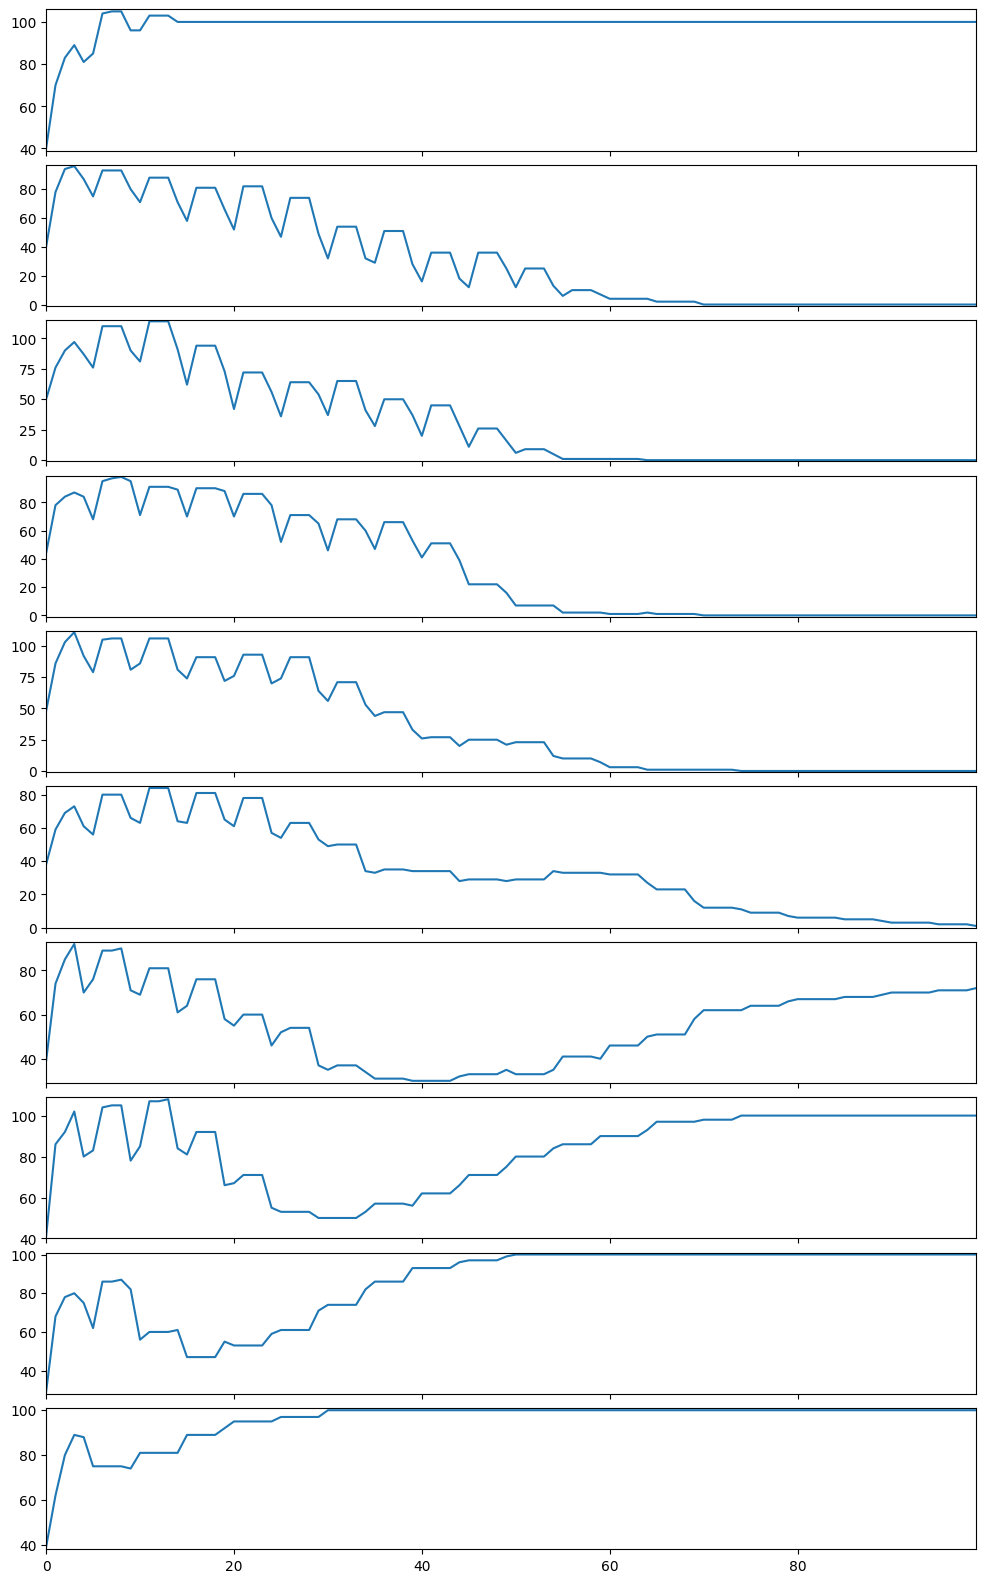

In [283]:
matriz = zonaz_array

# Obtén las dimensiones de la matriz
filas = len(matriz)

# Crea un subplot para cada casilla de la matriz
fig, axs = plt.subplots(filas, 1, figsize=(12, 20))

# Itera a través de la matriz y dibuja cada arreglo en su casilla correspondiente
for i in range(filas):
    arreglo = matriz[i]
    x = np.arange(len(arreglo))
    axs[i].plot(x, arreglo)
    axs[i].set_xlim(0, len(arreglo) - 1)  # Ajusta los límites del eje x
    axs[i].set_ylim(min(arreglo) - 1, max(arreglo) + 1)  # Ajusta los límites del eje y
    if i<filas-1:
        axs[i].set_xticklabels([])


# Ajusta el espacio entre los subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Muestra el grid
plt.show()


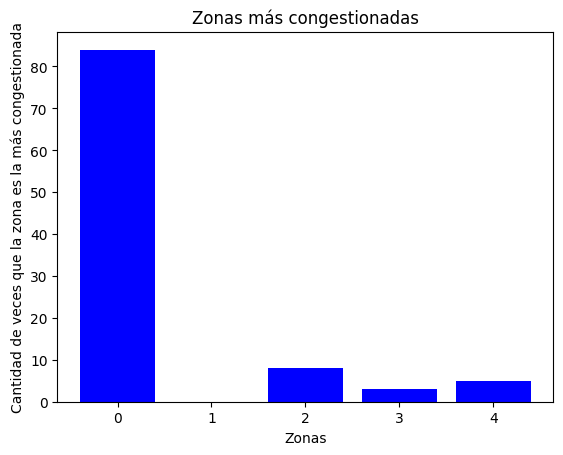

In [285]:
unique_values, value_counts = np.unique(zonas_mas_concurridas, return_counts=True)
plt.bar(unique_values, value_counts, color='b', label='Zonas', linestyle='-')

# Optionally, add labels and title
plt.xlabel('Zonas')
plt.ylabel('Cantidad de veces que la zona es la más congestionada')
plt.title('Zonas más congestionadas')

# Show the plot
plt.show()


**a. ¿Qué es el modelado multiescala y por qué es valioso para comprender el flujo y la congestión del tráfico
urbano?**  

El modelo multiescala es una forma de realizar simulaciones que permitan capturar fenómenos en diferentes escalas, de forma que se pueda tener una representación más realista y precisa. De esta manear, es posible tener relaciones e interacciones a diferentes niveles, de forma que se observen patrones emergentes en diferentes escalas, lo cual ayuda a evaluar distintos comportamientos. Para la congestión de tráfico es valioso porque este fenómeno tiene diferentes formas. Nuestra simulación esta hasta cierto punto simplista, porque solo tomamos en cuenta zonas, calles y carros, pero el tráfico tiene muchas más variables. Sin embargo, solo con estas 3 que se tomaron, se puede ver que se obtienen resultados interesantes con respecto al tráfico. Entonces, es posible modelar en muchos niveles el tráfico urbano, de forma que se puedan identificar problemas en cada uno de estos niveles y así poder solucionarlos.

**b. Describe el modelo individual a nivel de vehículo en esta simulación multiescala. ¿Qué parámetros y
factores se consideran a esta escala?**
A nivel individual los carros cuando están estacionados en su casa tienen una probabilidad de salir o no. Luego el carro simplemente tiene la responsabilidad de saber en que calle se encuentra.

**c. Explique el modelo a nivel de segmento de carretera. ¿Cómo tiene en cuenta la densidad del tráfico, los
límites de velocidad y la congestión?**  

Para tomar en cuenta la densidad de tráfico se tiene un límite de carros que pueden haber en una calle al mismo tiempo. Este se uno con una cola que se maneja para modelar la densidad de tráfico. La diferencia entre el límite y la cantidad de carros en cola, se puede saber si la calle está congestionada o no. En este caso, la velocidad de los carros se tomó como constante, es decir, estos pasan de un espacio de la cola a otra en movimientos constantes. Sin embargo, si las cola de la calle y de las calles aledañas están libres, los carros se pueden mover más rápido.

**d. Analice el modelo a nivel de intersección. ¿Qué variables se tienen en cuenta al simular las interacciones de
vehículos en las intersecciones?**

En las intersecciones se tienen en cuenta dos factores. El primero es un semáforo que tiene el mismo tiempo en rojo que en verde, solo se tienen dos colores. Entonces, si el semáforo está en verde, los carros pueden pasar al siguiente carril. Por otra parte, se maneja una cola en cada calle, y si la cola de la siguiente calle está llena, los carros no pueden pasar. En este caso como se tiene programación secuencial, no hay problema con choques entre calles, pero si se hiciera paralelamente, se deberían tomar en cuenta otras restricciones.
